<a href="https://colab.research.google.com/github/ardimaulana9066-rgb/Tugas4_Citra-Digital/blob/main/Salinan_dari_Salinan_dari_Selamat_Datang_di_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selamat Datang di Colab!

## Pelajari Gemini API
Gemini API memberi Anda akses ke model Gemini yang dibuat oleh Google DeepMind. Sejak awal, model Gemini dirancang agar bersifat multimodal, sehingga Anda dapat melakukan analisis dengan lancar menggunakan teks, gambar, kode, dan audio.

**Ingin tahu cara memulai?**
*  Buka <a href="https://aistudio.google.com/">Google AI Studio</a> dan login dengan Akun Google Anda.
*  <a href="https://aistudio.google.com/app/apikey">Membuat kunci API</a>.
* Gunakan panduan memulai untuk <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a>, atau panggil REST API menggunakan <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.

**Temukan kemampuan canggih Gemini**
*  Bereksperimenlah dengan <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">output multimodal</a> Gemini, yang menggabungkan teks dan gambar secara iteratif.
*  Temukan <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">Multimodal Live API</a> &#40;demo tersedia <a href="https://aistudio.google.com/live">di sini</a>&#41;.
*  Pelajari cara <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">menganalisis gambar dan mendeteksi item di foto Anda</a> menggunakan Gemini &#40;tersedia juga bonus <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">versi 3D</a>&#41;.
*  Dapatkan manfaat dari <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">model pemikiran Gemini</a>, yang mampu menyelesaikan berbagai tugas kompleks dengan pemikiran internalnya.
      
**Pelajari kasus penggunaan yang kompleks**
*  Gunakan <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">kemampuan grounding Gemini</a> untuk membuat laporan tentang perusahaan berdasarkan informasi yang dapat ditemukan model di internet.
*  Ekstrak <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">invoice dan data formulir dari PDF</a> dengan cara yang terstruktur.
*  Buat <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">ilustrasi berdasarkan seluruh buku</a> menggunakan jendela konteks besar Gemini dan Imagen.

Untuk mempelajari lebih lanjut, lihat <a href="https://github.com/google-gemini/cookbook">cookbook Gemini</a> atau buka <a href="https://ai.google.dev/docs/">dokumentasi Gemini API</a>.


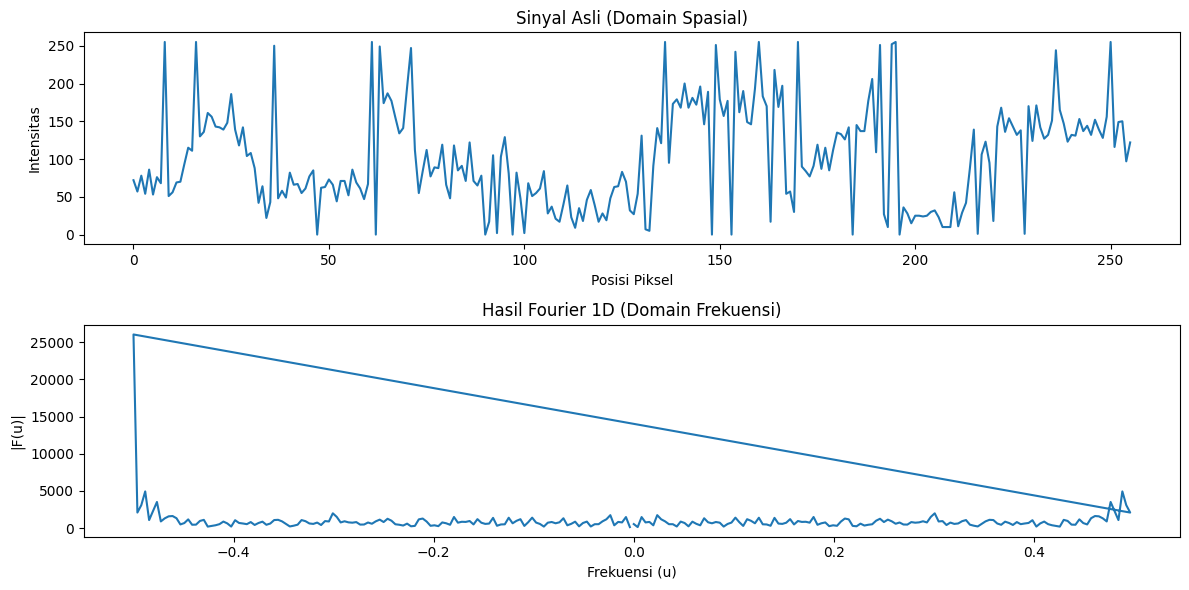

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('noise.png', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)
# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')


plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

Saving noise.png to noise (1).png


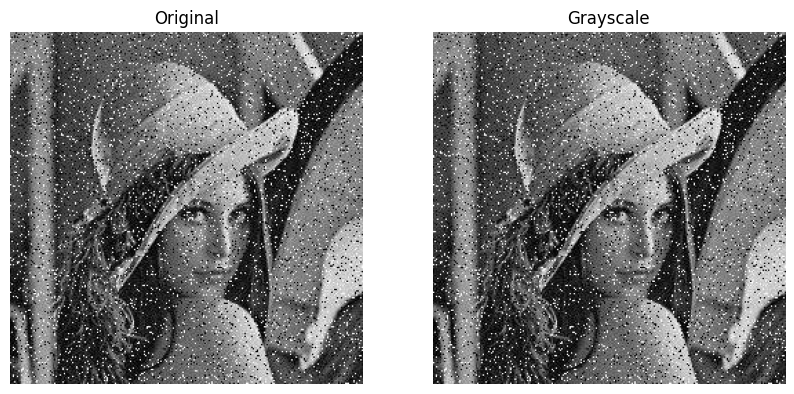

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Upload gambar dari laptop
uploaded = files.upload()

# Ambil nama file yang diupload
for filename in uploaded.keys():
    img = cv2.imread(filename)

# Convert ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.show()


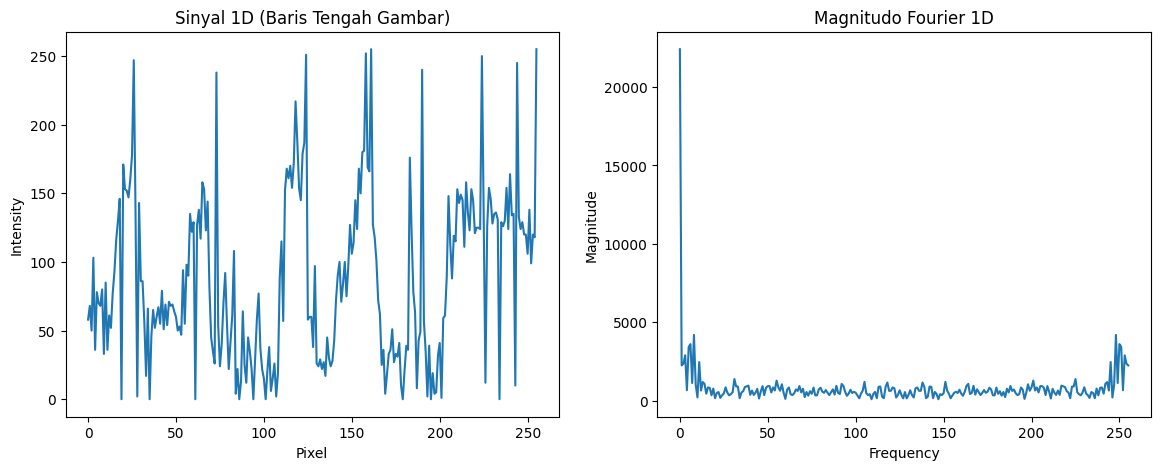

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ambil satu baris tengah dari citra grayscale
row = gray[gray.shape[0] // 2, :]

# Fourier Transform 1D
fft_result = np.fft.fft(row)

# Hitung magnitudenya (spektum)
magnitude = np.abs(fft_result)

# Plot sinyal asli (1D)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("Sinyal 1D (Baris Tengah Gambar)")
plt.plot(row)
plt.xlabel("Pixel")
plt.ylabel("Intensity")

# Plot Magnitude FFT
plt.subplot(1,2,2)
plt.title("Magnitudo Fourier 1D")
plt.plot(magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


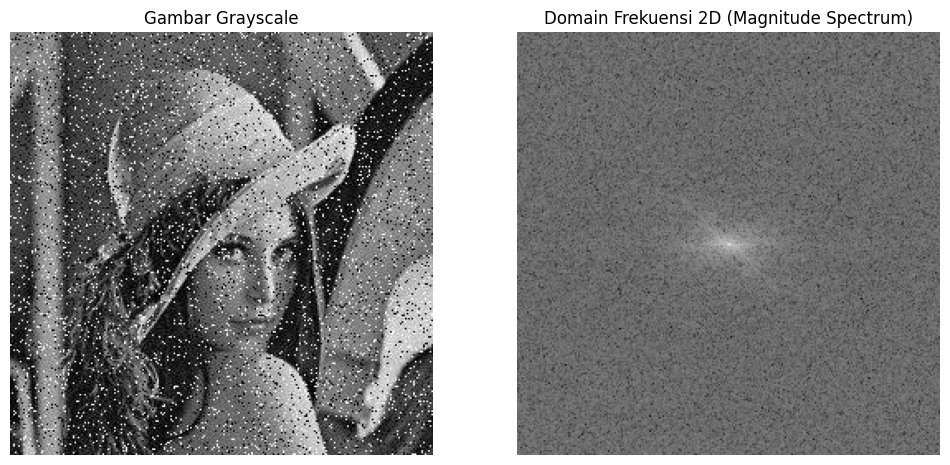

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pastikan variabel 'gray' sudah ada (hasil konversi grayscale)

# Lakukan Fourier Transform 2D
f = np.fft.fft2(gray)

# Geser zero-frequency ke tengah
fshift = np.fft.fftshift(f)

# Ambil magnitudo dan lakukan log untuk memperjelas visual
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

# Tampilkan hasil
plt.figure(figsize=(12,6))

# Gambar Grayscale Asli
plt.subplot(1,2,1)
plt.title("Gambar Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis("off")

# Domain Frekuensi (Magnitude Spectrum)
plt.subplot(1,2,2)
plt.title("Domain Frekuensi 2D (Magnitude Spectrum)")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis("off")

plt.show()


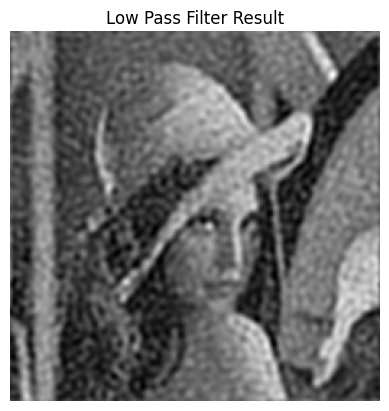

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# FFT 2D + shift
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

# Buat Mask Low Pass
rows, cols = gray.shape
crow, ccol = rows//2, cols//2
radius = 40  # semakin besar → filter lebih banyak
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, -1)

# Apply mask
fshift_lpf = fshift * mask

# Inverse FFT
img_lpf = np.fft.ifft2(np.fft.ifftshift(fshift_lpf))
img_lpf = np.abs(img_lpf)

plt.imshow(img_lpf, cmap='gray')
plt.title("Low Pass Filter Result")
plt.axis("off")
plt.show()


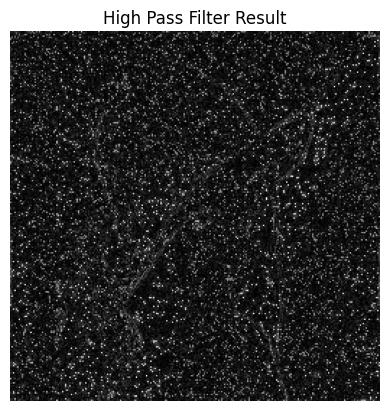

In [ ]:
mask_hpf = 1 - mask      # kebalikan dari Low Pass
fshift_hpf = fshift * mask_hpf

img_hpf = np.fft.ifft2(np.fft.ifftshift(fshift_hpf))
img_hpf = np.abs(img_hpf)

plt.imshow(img_hpf, cmap='gray')
plt.title("High Pass Filter Result")
plt.axis("off")
plt.show()


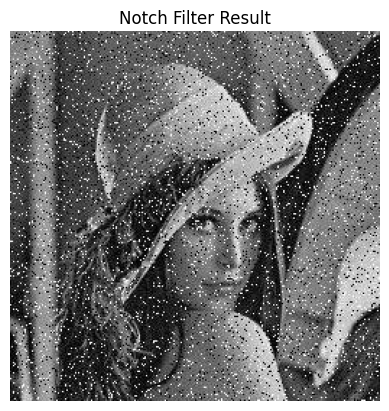

In [ ]:
# Copy fshift
notch = fshift.copy()

# Contoh: hilangkan titik noise di koordinat tertentu
# (Kamu harus melihat spektrum 2D untuk tahu koordinatnya)
notch[crow+30, ccol+30] = 0
notch[crow-30, ccol-30] = 0

img_notch = np.fft.ifft2(np.fft.ifftshift(notch))
img_notch = np.abs(img_notch)

plt.imshow(img_notch, cmap='gray')
plt.title("Notch Filter Result")
plt.axis("off")
plt.show()


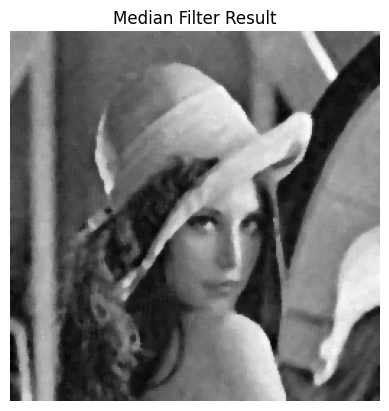

In [ ]:
median_filtered = cv2.medianBlur(gray, 5)

plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter Result")
plt.axis("off")
plt.show()


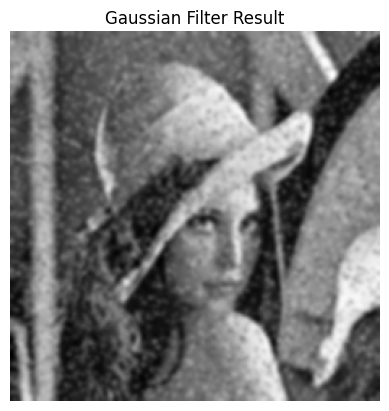

In [ ]:
gaussian_filtered = cv2.GaussianBlur(gray, (7,7), 1.5)

plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filter Result")
plt.axis("off")
plt.show()


Colab kini memiliki fitur AI yang didukung oleh <a href="https://gemini.google.com">Gemini</a>. Video berikut memberikan informasi tentang cara menggunakan fitur ini, baik jika Anda baru mengenal Python, atau sudah berpengalaman.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  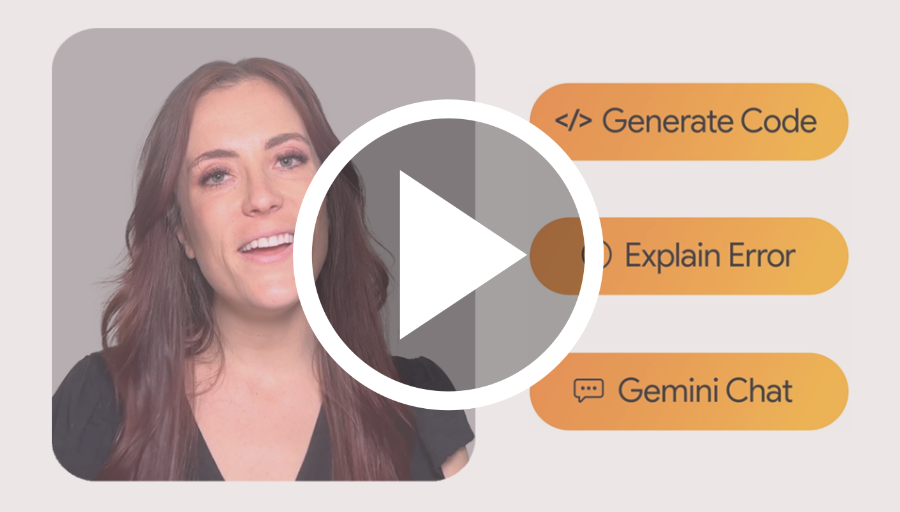
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Apa itu Colab?</h2>
</div>

Colab, atau "Colaboratory", memungkinkan Anda menulis dan mengeksekusi Python di browser, dengan
- Tidak memerlukan konfigurasi
- Akses tanpa biaya ke GPU
- Berbagi dengan mudah

Baik Anda seorang <strong>siswa</strong>, <strong>data scientist</strong>, atau <strong>peneliti AI</strong>, Colab dapat memudahkan pekerjaan Anda. Tonton <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Pengantar Colab</a> atau <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y">Fitur Colab yang Mungkin Belum Anda Ketahui</a> untuk mempelajari lebih lanjut, atau cukup mulai di bawah ini.

<div class="markdown-google-sans">

## <strong>Memulai</strong>
</div>

Dokumen yang sedang Anda baca bukan halaman statis. Ini media interaktif bernama <strong>notebook Colab</strong> yang memungkinkan Anda menulis dan mengeksekusi kode.

Misalnya, berikut ini <strong>kode sel</strong> dengan skrip Python pendek yang mengomputasi sebuah nilai, menyimpannya dalam suatu variabel, dan mencetak hasilnya:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Untuk mengeksekusi kode dalam sel di atas, pilih kode tersebut dengan mengkliknya, kemudian tekan tombol putar di sebelah kiri kode atau gunakan pintasan keyboard "Command/Ctrl+Enter". Untuk mengedit kode, cukup klik sel dan mulai pengeditan.

Variabel yang Anda tentukan dalam sebuah sel nantinya dapat digunakan di sel lain:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Notebook Colab memungkinkan Anda menggabungkan <strong>kode yang dapat dijalankan</strong> dan <strong>rich text</strong> dalam satu dokumen, beserta <strong>gambar</strong>, <strong>HTML</strong>, <strong>LaTeX</strong>, dan lainnya. Saat Anda membuat notebook Colab Anda sendiri, notebook tersebut akan disimpan di akun Google Drive Anda. Anda dapat dengan mudah membagikan notebook Colab Anda dengan rekan kerja atau teman, sehingga memungkinkan mereka memberikan komentar di notebook Anda atau bahkan mengeditnya. Untuk mempelajari lebih lanjut, buka <a href="/notebooks/basic_features_overview.ipynb">Ringkasan Colab</a>. Untuk membuat notebook Colab baru, Anda dapat menggunakan menu File di atas, atau menggunakan link berikut: <a href="http://colab.research.google.com#create=true">buat notebook Colab baru</a>.

Notebook Colab adalah notebook Jupyter yang dihosting oleh Colab. Untuk mempelajari project Jupyter lebih lanjut, buka <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ilmu data
</div>

Dengan Colab, Anda dapat memanfaatkan kecanggihan library Python yang populer untuk menganalisis dan memvisualisasikan data. Sel kode di bawah menggunakan <strong>numpy</strong> untuk menghasilkan beberapa data acak, dan menggunakan <strong>matplotlib</strong> untuk memvisualisasikannya. Untuk mengedit kode, cukup klik sel dan mulai pengeditan.

Anda dapat mengimpor data sendiri ke notebook Colab dari akun Google Drive Anda, termasuk dari spreadsheet, GitHub, dan berbagai sumber lainnya. Untuk mempelajari lebih lanjut pengimporan data dan bagaimana Colab dapat digunakan untuk ilmu data, lihat link di bawah pada bagian <a href="#working-with-data">Bekerja dengan Data</a>.

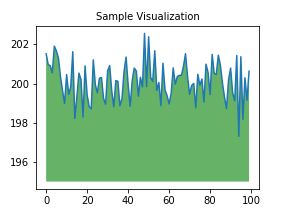

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Notebook Colab mengeksekusi kode di server cloud Google. Artinya, Anda dapat memanfaatkan kecanggihan hardware Google, termasuk <a href="#using-accelerated-hardware">GPU dan TPU</a>, terlepas dari kecanggihan komputer Anda. Yang Anda butuhkan hanyalah browser.

Misalnya, jika Anda harus menunggu kode <strong>pandas</strong> selesai dijalankan dan ingin mempercepat prosesnya, Anda dapat beralih ke Runtime GPU dan menggunakan library seperti <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a> yang menyediakan akselerasi tanpa perubahan kode.

Untuk mempelajari lebih lanjut cara mempercepat pandas di Colab, lihat <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">panduan 10 menit</a> atau
 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">demo analisis data pasar saham AS</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Dengan Colab, Anda dapat mengimpor set data gambar, melatih pengklasifikasi gambar di dalamnya, dan mengevaluasi model hanya dengan <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">beberapa baris kode</a>.

Colab digunakan secara luas di komunitas machine learning dengan berbagai penerapan meliputi:
- Memulai TensorFlow
- Mengembangkan dan melatih jaringan neural
- Bereksperimen dengan TPU
- Menyebarkan riset AI
- Membuat tutorial

Untuk melihat sampel notebook Colab yang menunjukkan penerapan machine learning, lihat <a href="#machine-learning-examples">contoh machine learning</a> di bawah.

<div class="markdown-google-sans">

## Referensi Lainnya

### Bekerja dengan Notebook di Colab

</div>

- [Ringkasan Colab](/notebooks/basic_features_overview.ipynb)
- [Panduan tentang Markdown](/notebooks/markdown_guide.ipynb)
- [Mengimpor library dan menginstal dependensi](/notebooks/snippets/importing_libraries.ipynb)
- [Menyimpan dan memuat notebook di GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulir interaktif](/notebooks/forms.ipynb)
- [Widget interaktif](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Bekerja dengan Data
</div>

- [Memuat data: Drive, Spreadsheet, dan Google Cloud Storage](/notebooks/io.ipynb)
- [Diagram: memvisualisasikan data](/notebooks/charts.ipynb)
- [Memulai BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning

<div>

Berikut beberapa notebook yang terkait dengan Machine Learning, termasuk kursus Machine Learning online Google. Buka <a href="https://developers.google.com/machine-learning/crash-course/">situs kursus lengkap</a> untuk mengetahui info selengkapnya.
- [Pengantar Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Pengantar RAPIDS cuDF untuk mempercepat pandas](https://nvda.ws/rapids-cudf)
- [Mulai menggunakan mode akselerator cuML](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Regresi linear dengan tf.keras menggunakan data sintetis](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Menggunakan Hardware yang Diakselerasi
</div>

- [TensorFlow dengan GPU](/notebooks/gpu.ipynb)
- [TPU di Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Contoh bagus

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Melatih Kembali Pengklasifikasi Gambar</a>: Membangun model Keras di atas pengklasifikasi gambar yang telah terlatih untuk membedakan berbagai bunga.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Klasifikasi Teks</a>: Mengklasifikasikan ulasan film IMDB, baik sebagai <em>positif</em> ataupun <em>negatif</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transfer Gaya</a>: Menggunakan deep learning untuk mentransfer gaya antar-gambar.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Tanya Jawab Encoder Kalimat Universal Multibahasa</a>: Menggunakan model machine learning untuk menjawab pertanyaan dari set data SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Jenis Interpolasi Video</a>: Memprediksi apa yang terjadi dalam suatu video antara bingkai pertama dan terakhir.


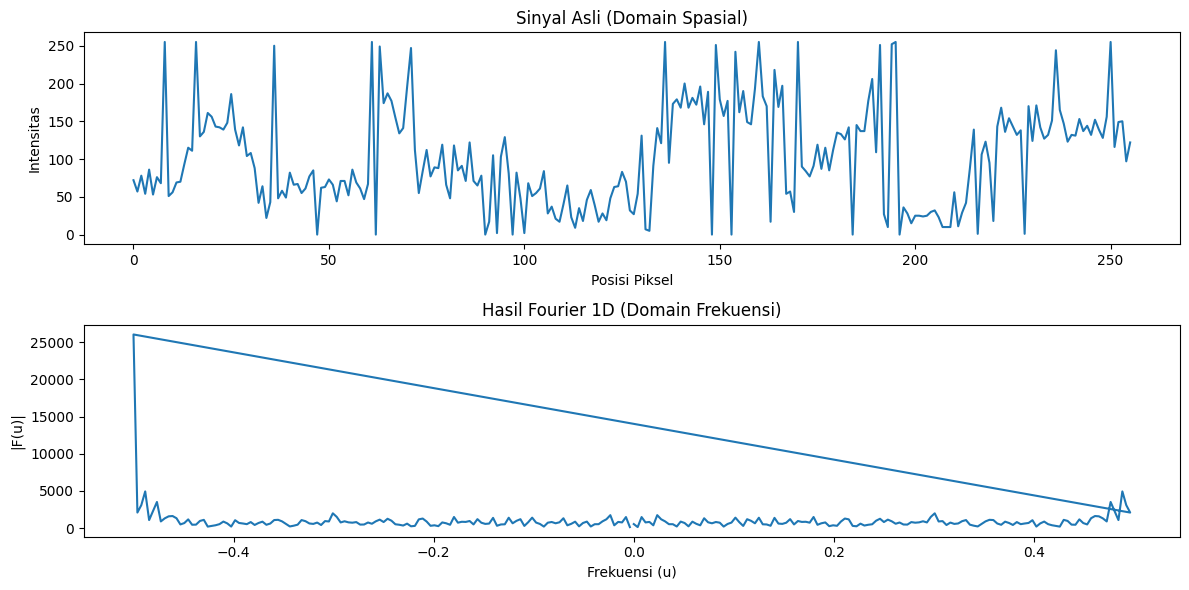

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('noise.png', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)
# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')


plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()